<a href="https://colab.research.google.com/github/katyayani-jha/ML-LAB-CS12/blob/main/ML_Lab_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1.

In [10]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/retail.txt'
data = pd.read_csv(file_path, header=None, delimiter=' ', engine='python', on_bad_lines='warn')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Streaming output truncated to the last 5000 lines.

  data = pd.read_csv(file_path, header=None, delimiter=' ', engine='python', on_bad_lines='warn')
<ipython-input-13-390f09ea9d9c>:6: ParserWarning: Skipping line 32029: Expected 30 fields in line 32029, saw 33

  data = pd.read_csv(file_path, header=None, delimiter=' ', engine='python', on_bad_lines='warn')
<ipython-input-13-390f09ea9d9c>:6: ParserWarning: Skipping line 32071: Expected 30 fields in line 32071, saw 36

  data = pd.read_csv(file_path, header=None, delimiter=' ', engine='python', on_bad_lines='warn')
<ipython-input-13-390f09ea9d9c>:6: ParserWarning: Skipping line 32129: Expected 30 fields in line 32129, saw 43

  data = pd.read_csv(file_path, header=None, delimiter=' ', engine='python', on_bad_lines='warn')
<ipython-input-13-390f09ea9d9c>:6: ParserWarning: Skipping line 32143: Expected 30 fields in line 32143, saw 34

  data = pd.read_csv(file_path, header=None, delimiter=' ', engine='python', on_bad_lines='warn')
<ipyth

In [14]:
# Converting data into a list of transactions (each row as a list of items)
transactions = data.apply(lambda row: [str(item).strip() for item in row if pd.notnull(item)], axis=1).tolist()

# Transforming transactions to a one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

def run_apriori(dataframe, min_support):
    frequent_itemsets = apriori(dataframe, min_support=min_support, use_colnames=True)
    # Adding a length column for the itemset size
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    return frequent_itemsets

min_support_values = [0.05, 0.03, 0.01]

for min_support in min_support_values:
    print(f"\nFrequent Itemsets for min_support = {min_support}")
    frequent_itemsets = run_apriori(df, min_support=min_support)
    print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Frequent Itemsets for min_support = 0.05
     support            itemsets  length
0   0.168593              (33.0)       1
1   0.175408              (39.0)       1
2   0.572222              (40.0)       1
3   0.164420              (42.0)       1
4   0.470502              (49.0)       1
5   0.092614        (33.0, 40.0)       2
6   0.087178        (49.0, 33.0)       2
7   0.115174        (40.0, 39.0)       2
8   0.087143        (49.0, 39.0)       2
9   0.124969        (40.0, 42.0)       2
10  0.323908        (49.0, 40.0)       2
11  0.097032        (49.0, 42.0)       2
12  0.057932  (49.0, 33.0, 40.0)       3
13  0.066348  (49.0, 40.0, 39.0)       3
14  0.078902  (49.0, 40.0, 42.0)       3

Frequent Itemsets for min_support = 0.03
     support            itemsets  length
0   0.031678             (111.0)       1
1   0.034916             (171.0)       1
2   0.035383             (226.0)       1
3   0.032753             (238.0)       1
4   0.168593              (33.0)       1
5   0.032964  

Question 2.

In [17]:
transactions = data.apply(lambda row: [str(item).strip() for item in row if pd.notnull(item)], axis=1).tolist()

te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

min_support_values = [0.05, 0.03, 0.01]
min_confidence_values = [0.5, 0.6, 0.7]

frequent_patterns_counts = []
association_rules_counts = []

for min_support in min_support_values:
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    frequent_patterns_counts.append(len(frequent_itemsets))
    print(f"\nFrequent Itemsets for min_support = {min_support}")
    print(frequent_itemsets)

    for min_confidence in min_confidence_values:
        num_itemsets = len(frequent_itemsets)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence, num_itemsets=num_itemsets)
        association_rules_counts.append((min_support, min_confidence, len(rules)))
        print(f"\nAssociation Rules for min_support = {min_support} and min_confidence = {min_confidence}")
        print(rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Frequent Itemsets for min_support = 0.05
     support            itemsets
0   0.168593              (33.0)
1   0.175408              (39.0)
2   0.572222              (40.0)
3   0.164420              (42.0)
4   0.470502              (49.0)
5   0.092614        (33.0, 40.0)
6   0.087178        (49.0, 33.0)
7   0.115174        (40.0, 39.0)
8   0.087143        (49.0, 39.0)
9   0.124969        (40.0, 42.0)
10  0.323908        (49.0, 40.0)
11  0.097032        (49.0, 42.0)
12  0.057932  (49.0, 33.0, 40.0)
13  0.066348  (49.0, 40.0, 39.0)
14  0.078902  (49.0, 40.0, 42.0)

Association Rules for min_support = 0.05 and min_confidence = 0.5
     antecedents consequents  antecedent support  consequent support  \
0         (33.0)      (40.0)            0.168593            0.572222   
1         (33.0)      (49.0)            0.168593            0.470502   
2         (39.0)      (40.0)            0.175408            0.572222   
3         (42.0)      (40.0)            0.164420            0.572222   
4  

Question 3.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


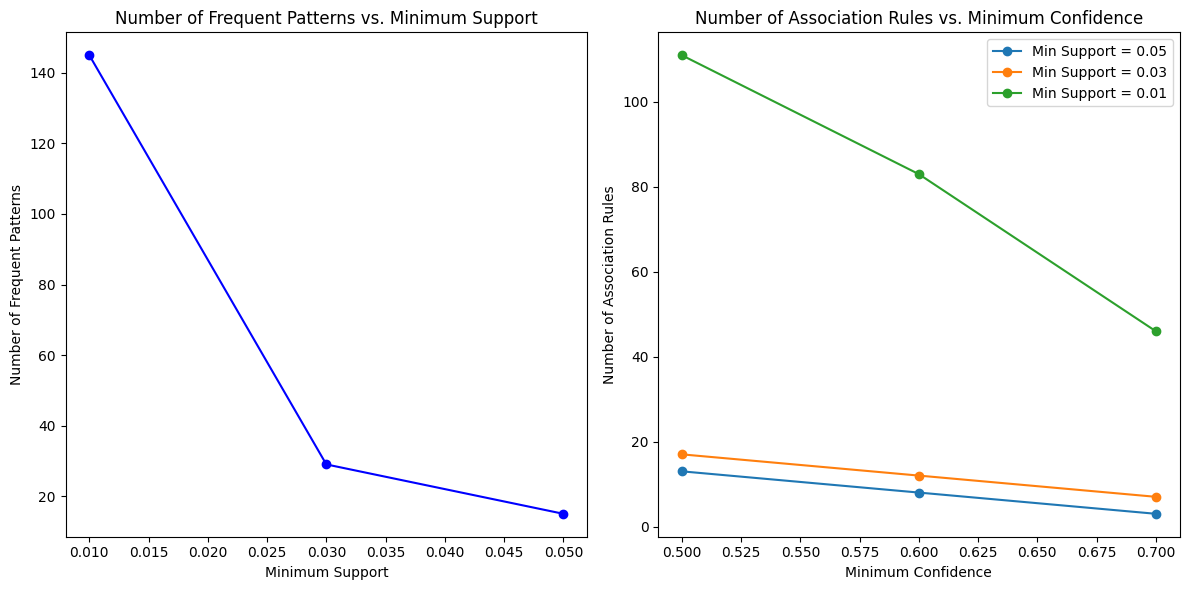

In [18]:
import matplotlib.pyplot as plt

support_values, confidence_values, rule_counts = zip(*association_rules_counts)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(min_support_values, frequent_patterns_counts, marker='o', color='b')
plt.title('Number of Frequent Patterns vs. Minimum Support')
plt.xlabel('Minimum Support')
plt.ylabel('Number of Frequent Patterns')

plt.subplot(1, 2, 2)
for min_support in min_support_values:
    counts = [rule_counts[i] for i in range(len(support_values)) if support_values[i] == min_support]
    plt.plot(min_confidence_values, counts, marker='o', label=f'Min Support = {min_support}')

plt.title('Number of Association Rules vs. Minimum Confidence')
plt.xlabel('Minimum Confidence')
plt.ylabel('Number of Association Rules')
plt.legend()
plt.tight_layout()
plt.show()